# Spam Detection
For detecing a message is a spam message or a Ham message.

In [68]:
# Importing data
import nltk
import numpy as np
import pandas as pd

data = pd.read_csv('spam_Ham_Data.csv',encoding='ISO-8859-1')
data.sample(7)
# Produces Random 7 samples of the data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3045,ham,So how's the weather over there?,NaN,NaN,NaN
3668,ham,Yeah imma come over cause jay wants to do some...,NaN,NaN,NaN
1650,ham,I dont have any of your file in my bag..i was ...,NaN,NaN,NaN
704,ham,True dear..i sat to pray evening and felt so.s...,NaN,NaN,NaN
5326,ham,What makes you most happy?,NaN,NaN,NaN
618,ham,I come n pick Ì_ up... Come out immediately af...,NaN,NaN,NaN
2346,ham,Its posible dnt live in &lt;#&gt; century cm ...,NaN,NaN,NaN


## Data Cleaning

In [69]:
data.shape

(5572, 5)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [71]:
# Dropping the last 3 useless columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
data.sample(7)

,v1,v2
843,spam,Urgent! call 09066350750 from your landline. Y...
1843,ham,Super da:)good replacement for murali
4994,ham,"Just looked it up and addie goes back Monday, ..."
4323,ham,I am not having her number sir
223,ham,U say leh... Of course nothing happen lar. Not...
5181,ham,K sure am in my relatives home. Sms me de. Pls:-)
3973,ham,Roger that. WeÛ÷re probably going to rem in a...


In [72]:
data.shape

(5572, 2)

In [73]:
data.rename(columns={'v1':'class','v2':'text'}, inplace=True)
data.head(7)

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


### Applying label 

In [74]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [75]:
data['class'] = encode.fit_transform(data['class'])
data.head()

# We are getting 0-> Ham, 1-> Spam

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
# Calculting Null Values
data.isnull().sum()

class    0
text     0
dtype: int64

In [77]:
# Checking the Duplicated values
data.duplicated().sum()

403

In [78]:
# Dropping duplicates
data.drop_duplicates(keep='last', inplace=True)

Data is almost clean as we require it.<br>
No Null, No Duplicates, Correct format

## EDA - Data Analysis

Whenever we are working on a supervised learning model we need to have the idea related to the data<br>
So EDA becomes so imp

In [79]:
data['class'].value_counts() 

class
0    4516
1     653
Name: count, dtype: int64

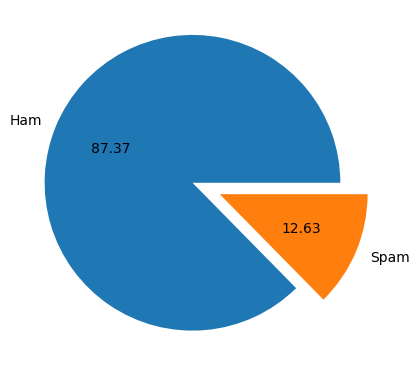

In [80]:
# Expressing it in Pie chart
import matplotlib.pyplot as plt
plt.pie(data['class'].value_counts(), labels=['Ham','Spam'], explode=[0.2,0], autopct="%0.2f")
plt.show() 

In [81]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
# Counting the no.of char, words, sentance in message

# this returns the length of all the chr present in the text
data['char_ct'] = data.text.apply(len)
data['wrd_ct'] = data.text.apply(lambda x : len(nltk.word_tokenize(x)))
data['sent_ct'] = data.text.apply(lambda x : len(nltk.sent_tokenize(x)))

data.head(9)

,class,text,char_ct,wrd_ct,sent_ct
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
10,0,I'm gonna be home soon and i don't want to tal...,109,28,2
13,0,I've been searching for the right words to tha...,196,41,3
14,0,I HAVE A DATE ON SUNDAY WITH WILL!!,35,10,2


In [83]:
# Checking the description of the the data -> word, sent, char...

data[['char_ct','wrd_ct','sent_ct']].describe()

,char_ct,wrd_ct,sent_ct
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#### Description of the Spam and Ham Seprately

In [84]:
# Ham Messages

data[data['class']==0][['char_ct','wrd_ct','sent_ct']].describe()

,char_ct,wrd_ct,sent_ct
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [85]:
# Spam Message

data[data['class']==1][['char_ct','wrd_ct','sent_ct']].describe()


,char_ct,wrd_ct,sent_ct
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Plotting the same

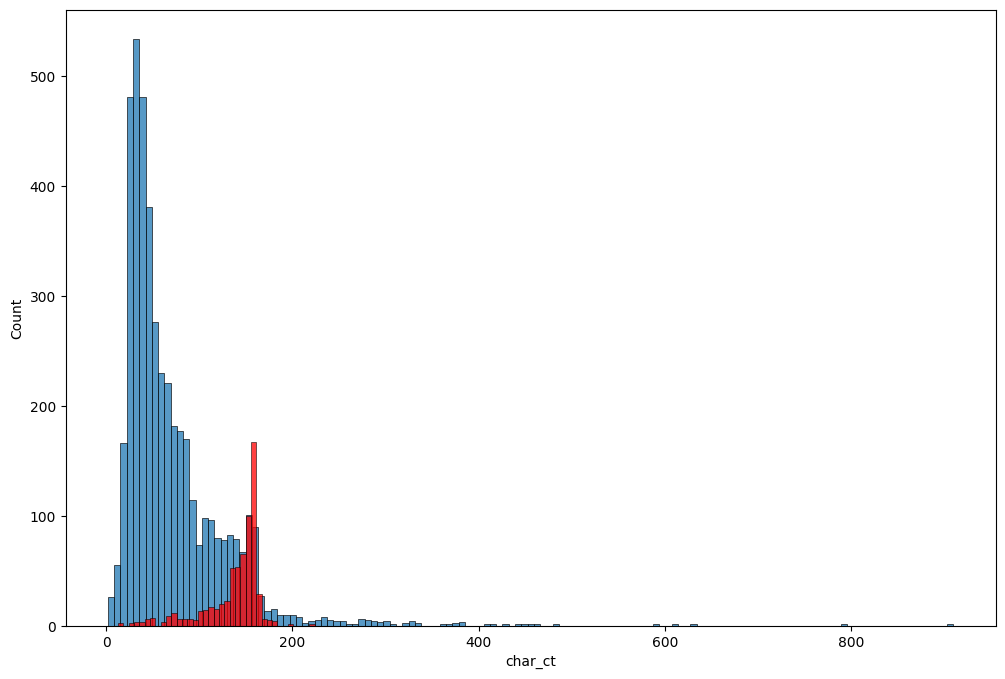

In [86]:
import seaborn as sns

plt.figure(figsize=(12,8))

# Plotting the number of character
sns.histplot(data[data['class']==0]['char_ct'])
sns.histplot(data[data['class']==1]['char_ct'], color='r')

plt.show()

# Here we can see both the classes simultemasuly

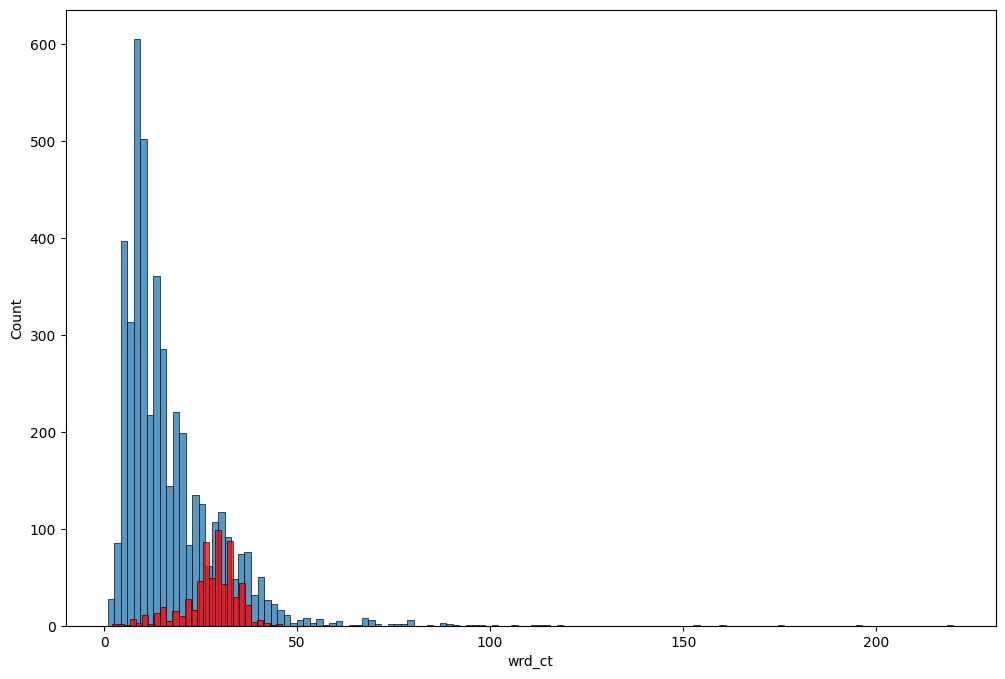

In [87]:
# Plotting the number of character
plt.figure(figsize=(12,8))

sns.histplot(data[data['class']==0]['wrd_ct'])
sns.histplot(data[data['class']==1]['wrd_ct'], color='r')

plt.show()


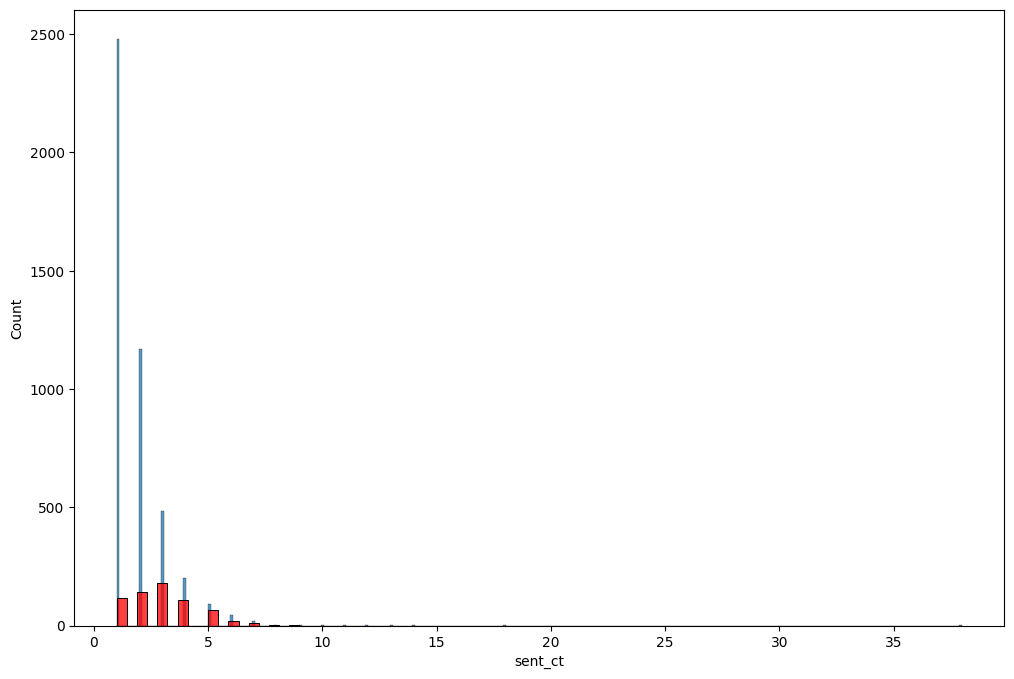

In [88]:
# Plotting the number of character
plt.figure(figsize=(12,8))

sns.histplot(data[data['class']==0]['sent_ct'])
sns.histplot(data[data['class']==1]['sent_ct'], color='r')

plt.show()


### Checking the inter column relation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


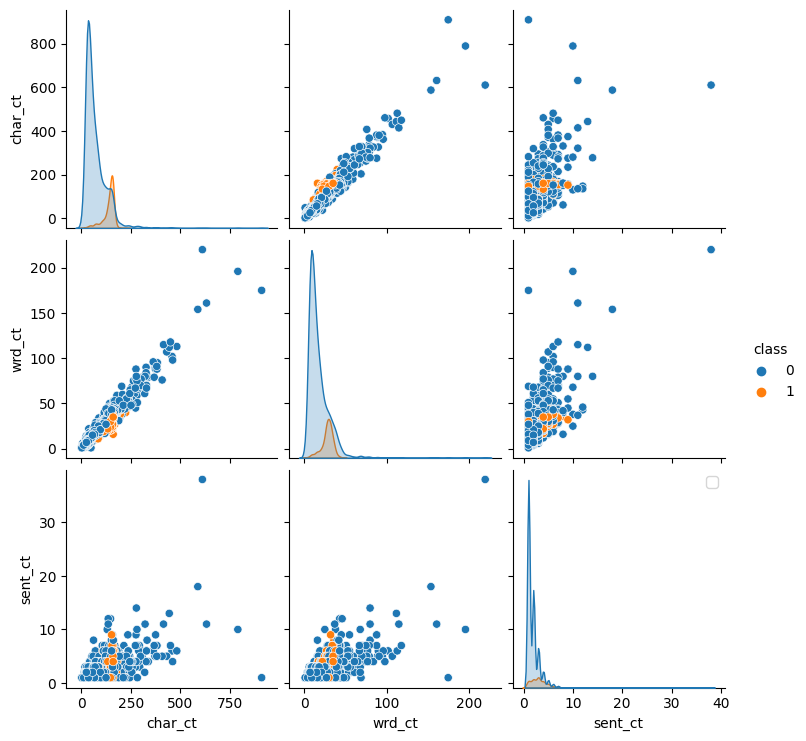

In [89]:
sns.pairplot(data, hue='class')
plt.legend()
plt.show()
# Hue= -> Coloring on the basis of the class

<Axes: >

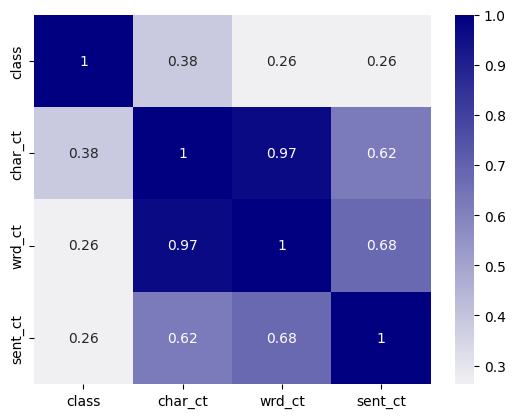

In [90]:
# Making HeatMap of the co-relattion
cplt = sns.light_palette('Navy', as_cmap = True)
sns.heatmap(data.drop(['text'],axis=1).corr(), cmap=cplt, annot = True)

Since all 3 have very strong co-relation among themseves. So we are going to keep only one of the column.

Between the 3 the heightest corr that posses with the class is char_ct so this would be the selection.

## Pre Processing

Things that we are gonna perform
- Converting all to lower case
- tokenizing
- removing special chars
- removing stop words
- stemming

In [91]:
from nltk.corpus import stopwords
import string
stp_wrds = stopwords.words('english')
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [92]:
# This func we are going to apply in all the text present.

# This is used to stem the word
from nltk.stem.porter import PorterStemmer
PS = PorterStemmer()

def transform(text):
    lst_of_words = []
    text= text.lower()
    text = nltk.word_tokenize(text)
    for wrd in text :
        if wrd.isalnum() and (wrd not in stp_wrds) and (wrd not in punc):
            lst_of_words.append(PS.stem(wrd))
    return " ".join(lst_of_words)

In [93]:
transform ("I am a awesome person. This is all about .... loveing : hehe : kaise, Ayush?")

'awesom person love hehe kais ayush'

In [94]:
data['transformed_Text'] = data['text'].apply(transform)
data.sample(5)

,class,text,char_ct,wrd_ct,sent_ct,transformed_Text
1152,0,Ok i go change also...,22,6,1,ok go chang also
1243,0,No shoot me. I'm in the docs waiting room. :/,45,14,3,shoot doc wait room
1551,0,In e msg jus now. U said thanks for gift.,41,12,2,e msg ju u said thank gift
1464,0,Wat makes u thk i'll fall down. But actually i...,131,34,3,wat make u thk fall actual thk quit prone 2 fa...
4420,0,Still at west coast... Haiz... ÌÏ'll take fore...,65,15,1,still west coast haiz ìï take forev come back


## Making Word Cloud for visualization

In [95]:
from wordcloud import WordCloud
wc = WordCloud(width = 1200, height= 700, min_font_size = 8, background_color = "white")

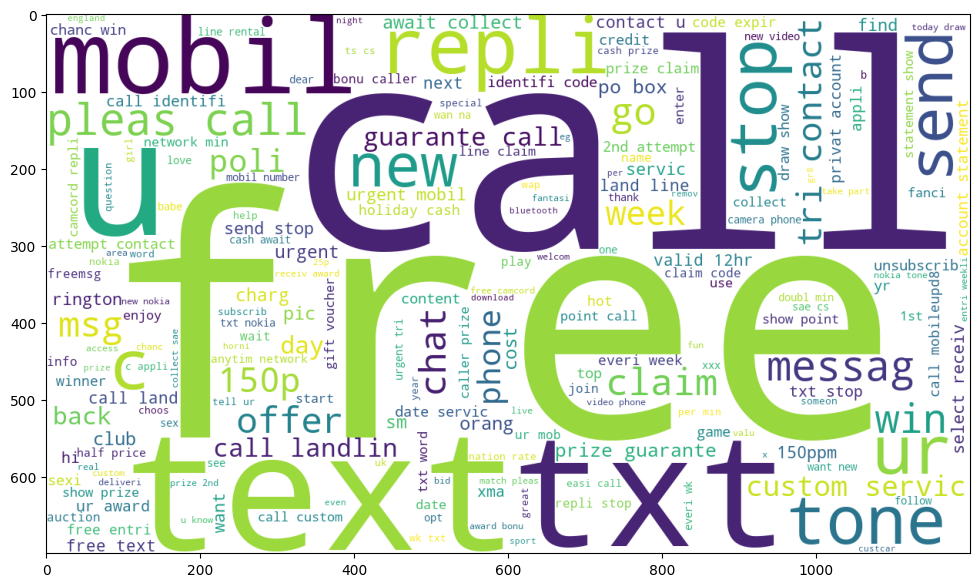

In [96]:
# Generating cloud for most used words in spam
plt.figure(figsize=(12,7))
spam_Wc = wc.generate(data[data['class'] == 1]['transformed_Text'].str.cat(sep = " "))
plt.imshow(spam_Wc)

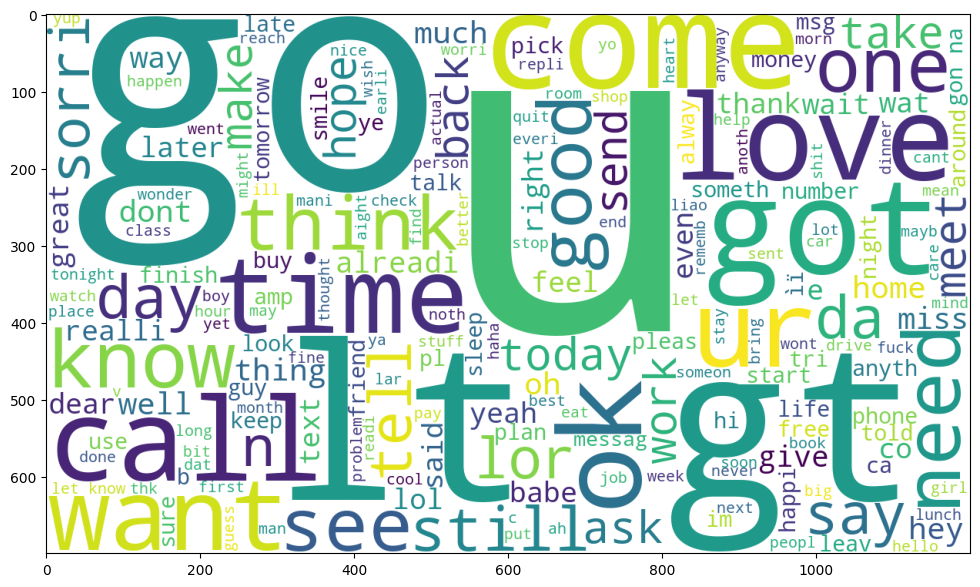

In [97]:
# Generating cloud for most used words in ham
plt.figure(figsize=(12,7))
ham_Wc = wc.generate(data[data['class'] == 0]['transformed_Text'].str.cat(sep = " "))
plt.imshow(ham_Wc)

### Most Common 50 words 

In [98]:
# Making a list of all the trans_text in and taknig all the words

spam_wrds =[]
# data[data['class']==1].transformed_Text.tolist() -> Creates the list of all the msg
for msg in data[data['class']==1].transformed_Text.tolist():
    for wrd in msg.split() :
        spam_wrds.append(wrd)

spam_wrds

['freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'link',
 'next',
 'txt',
 'messag',
 'click',
 'http',
 'england',
 'v',
 'macedonia',
 'dont',
 'miss',
 'news',
 'txt',
 'ur',
 'nation',
 'team',
 '87077',
 'eg',
 'england',
 '87077',
 'tri',
 'wale',
 'scotland',
 'poboxox36504w45wq',
 'thank',
 'subscript',
 'rington',
 'uk',
 'mobil',
 'charg',
 'pleas',
 'confirm',
 'repli',
 'ye',
 'repli',
 'charg',
 '07732584351',
 'rodger',
 'burn',
 'msg',
 'tri',
 'call',
 'repli',
 'sm',
 'free',
 'nokia',
 'mobil',
 'free',
 'camcord',
 'pleas',
 'call',
 '08000930705',
 'deliveri',
 'tomorrow',
 'sm',
 'ac',
 'sptv',
 'new',
 'jersey',
 'devil',
 'detroit',
 'red',
 'wing',
 'play',
 'ice',
 'hockey',
 'correct',
 'incorrect',
 'end',
 'repli',
 'end',
 'sptv',
 'congrat',
 '1',
 'year',
 'special',
 'cinema',
 'pass',
 '2',
 'call',


In [99]:
from collections import Counter
# This shows most common 50 words in the list
spam_wrds_df = pd.DataFrame(Counter(spam_wrds).most_common(50))
spam_wrds_df.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


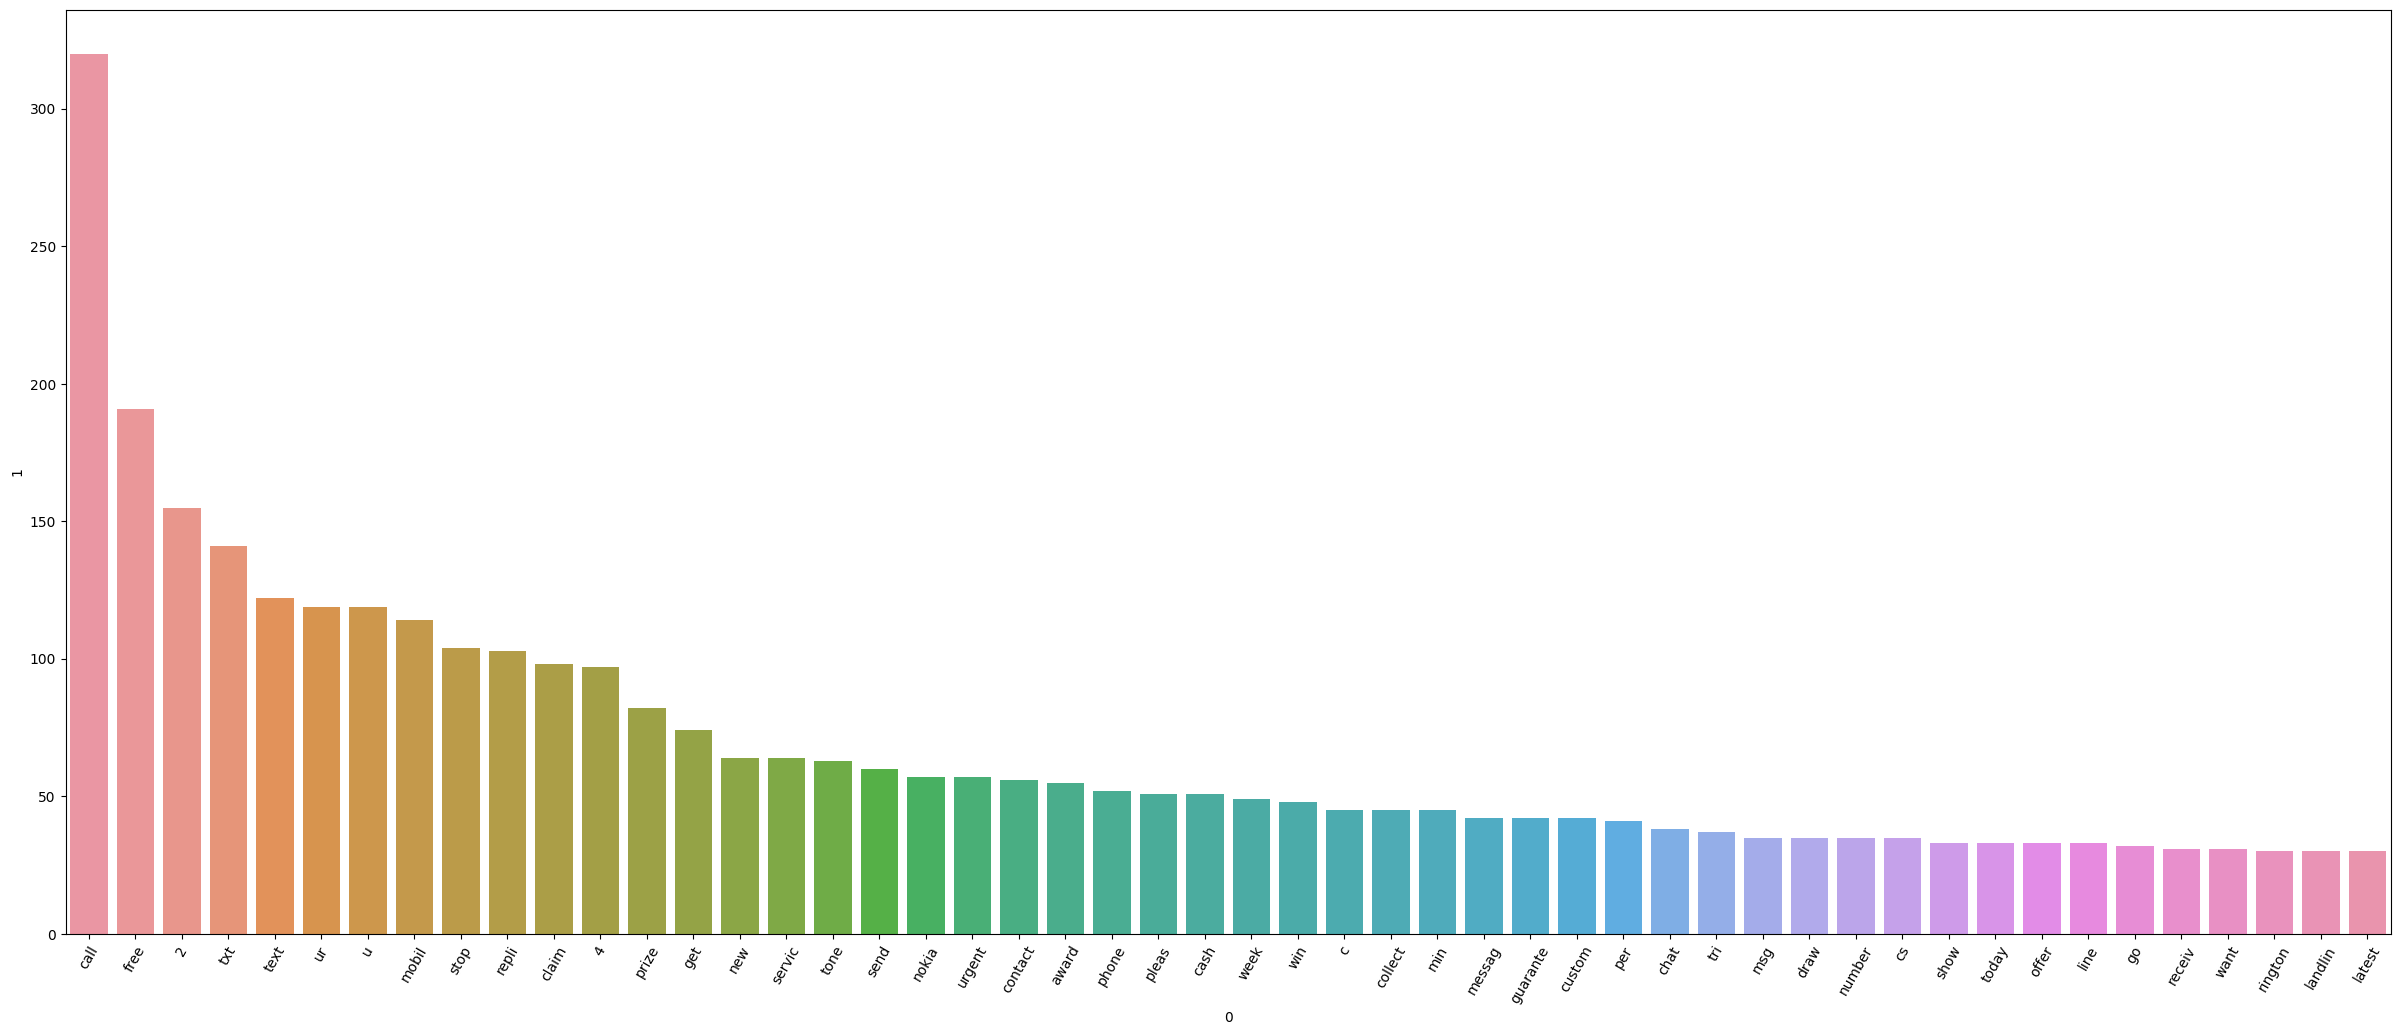

In [100]:
plt.figure(figsize=(30,12))
sns.barplot(x= spam_wrds_df[0], y=spam_wrds_df[1])
plt.xticks(rotation=60)
plt.show()

#### Repeating it for Ham

In [101]:
ham_wrds = []
for msg in data[data['class']==0].transformed_Text.tolist():
    for wrd in msg.split():
        ham_wrds.append(wrd)

ham_wrds

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'way',
 'u',
 'feel',
 'thatåõ',
 'way',
 'gota',
 'b',
 'serious',
 'spell',
 'name',
 'go',
 'tri',
 '2',
 'month',
 'ha',
 'ha',
 'joke',
 'pay',
 'first',
 'lar'

In [102]:
ham_wrd_df = pd.DataFrame(Counter(ham_wrds).most_common(50))
ham_wrd_df.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


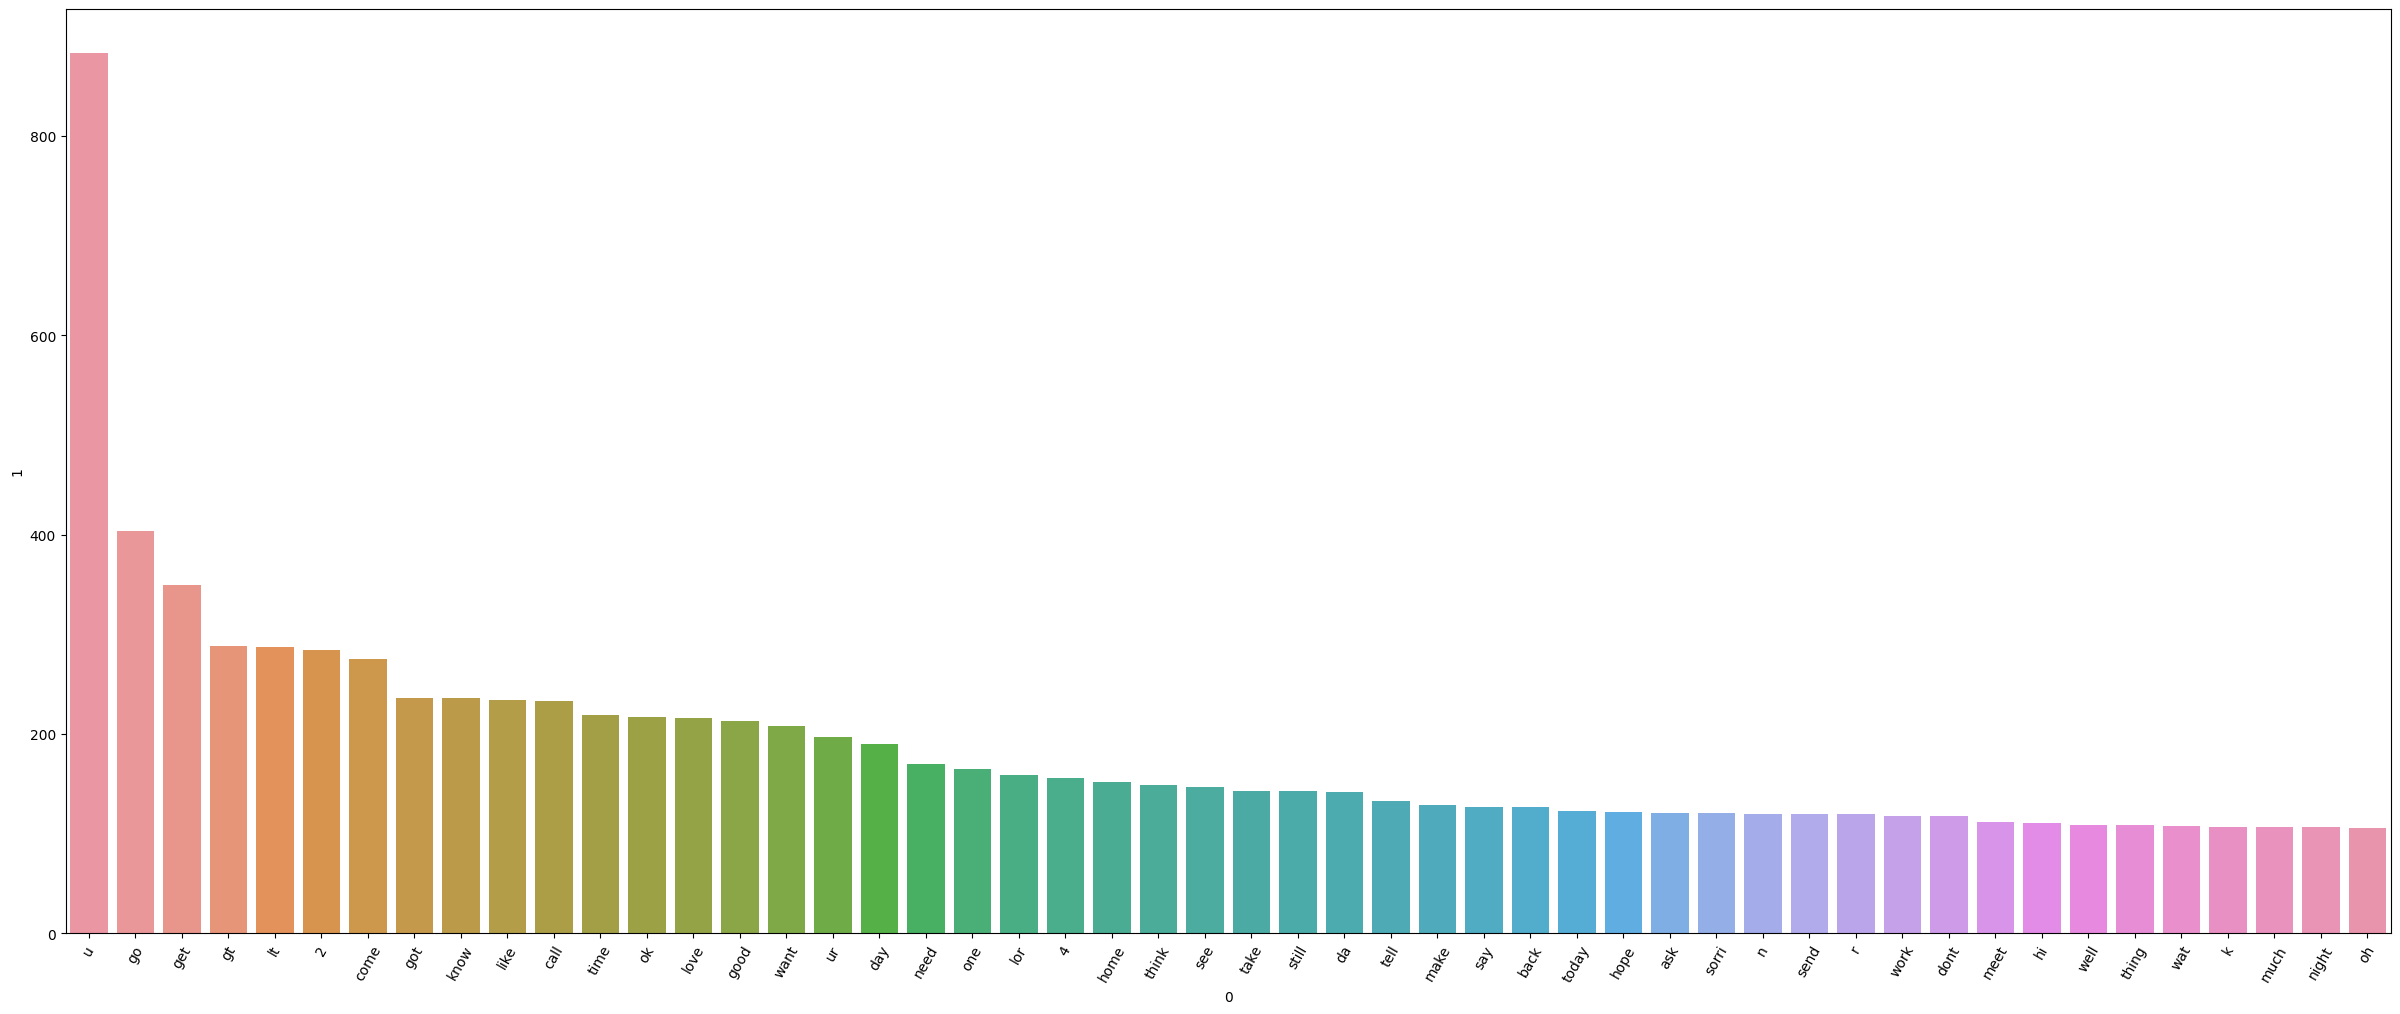

In [103]:
plt.figure(figsize = (30,12))
sns.barplot(x=ham_wrd_df[0], y=ham_wrd_df[1])
plt.xticks(rotation=60)
plt.show()

## Model Building

We are going to start the Process using the **NAIVE BASES** aproach -> It suits best with the Textual Data

For Vectorinsing the Text we are going to use the **Bag of Words** approach

In [114]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
vec = cv.fit_transform(data['transformed_Text']).toarray()
# Converting is imp as this is a sparse Array form
vec.shape

(5169, 6708)

In [115]:
# For Testing we arcreating vector usign Tfidf
# vec = TfidfVectorizer().fit_transform(data['transformed_Text']).toarray()

In [116]:
tar = data['class'].values
tar.shape

(5169,)

### Splitting the data

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(vec,tar,test_size=.2, random_state= len(tar))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4135, 6708)
(4135,)
(1034, 6708)
(1034,)


### Modeling

In [119]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [120]:
# Importing matrices for accuracy calcuation 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


# This is a high precission model so precision score is imp

#### Training

In [121]:
gnb.fit(X_train, Y_train)
Y_pre_gnb= gnb.predict(X_test)
# scr = accuracy_score(Y_pre_gnb, Y_test)
print('accuracy score:', accuracy_score(Y_pre_gnb, Y_test))
print('confusion matrix:\n', confusion_matrix(Y_pre_gnb, Y_test))
print('precision score:', precision_score(Y_pre_gnb, Y_test))

accuracy score: 0.8829787234042553
confusion matrix:
 [[808  21]
 [100 105]]
precision score: 0.8333333333333334


In [122]:
mnb.fit(X_train, Y_train)
Y_pre_gnb= mnb.predict(X_test)
# scr = accuracy_score(Y_pre_gnb, Y_test)
print('accuracy score:', accuracy_score(Y_pre_gnb, Y_test))
print('confusion matrix:\n', confusion_matrix(Y_pre_gnb, Y_test))
print('precision score:', precision_score(Y_pre_gnb, Y_test))

accuracy score: 0.9700193423597679
confusion matrix:
 [[894  17]
 [ 14 109]]
precision score: 0.8650793650793651


In [123]:
bnb.fit(X_train, Y_train)
Y_pre_gnb= bnb.predict(X_test)
print('accuracy score:', accuracy_score(Y_pre_gnb, Y_test))
print('confusion matrix:\n', confusion_matrix(Y_pre_gnb, Y_test))
print('precision score:', precision_score(Y_pre_gnb, Y_test))

accuracy score: 0.9661508704061895
confusion matrix:
 [[903  30]
 [  5  96]]
precision score: 0.7619047619047619


**Since its a imbalance data so there is more focus on *Precsion Score* Than that of accuracy**

<br>

We can also use K-fold measure for testing the model